In [1]:
import pandas as pd
import numpy as np
import sklearn
import json
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
from scipy import cluster
%matplotlib inline

In [2]:
train_df = pd.read_json("data/training.json")
train_df.head()

bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   

                                              description  \
10      A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
10000                                                       
100004  Top Top West Village location, beautiful Pre-w...   
100007  Building Amenities - Garage - Garden - fitness...   
100013  Beautifully renovated 3 bedroom flex 4 bedroom...   

            display_address  \
10      Metropolitan Avenue   
10000       Columbus Avenue   
100004          W 13 Street   
100007     East 49th Street   
100013    West 143rd Street   

                                                 features interest_level  \
10                                                     []         medium   
10000   [Doorman, Elevator, Fitness Center, Cats Allow...            low   
100004  [Laundry In Building, Dishwasher, Hardwood Flo...           high   
100007                          [Hardwood Floors, No Fee]            low   
100013                                          [Pre-War]            low   

        latitude  listing_id  longitude                        manager_id  \
10       40.7145     7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
10000    40.7947     7150865   -73.9667  7533621a882f71e25173b27e3139d83d   
100004   40.7388     6887163   -74.0018  d9039c43983f6e564b1482b273bd7b01   
100007   40.7539     6888711   -73.9677  1067e078446a7897d2da493d2f741316   
100013   40.8241     6934781   -73.9493  98e13ad4b495b9613cef886d79a6291f   

                                                   photos  price  \
10      [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
10000   [https://photos.renthop.com/2/7150865_be3306c5...   5465   
100004  [https://photos.renthop.com/2/6887163_de85c427...   2850   
100007  [https://photos.renthop.com/2/6888711_6e660cee...   3275   
100013  [https://photos.renthop.com/2/6934781_1fa4b41a...   3350   

                 street_address  
10      792 Metropolitan Avenue  
10000       808 Columbus Avenue  
100004          241 W 13 Street  
100007     333 East 49th Street  
100013    500 West 143rd Street

In [3]:
print('Samples:{}, number of features:{}'.format(train_df.shape[0],train_df.shape[1]))

Samples:49352, number of features:15


low       0.694683
medium    0.227529
high      0.077788
Name: interest_level, dtype: float64


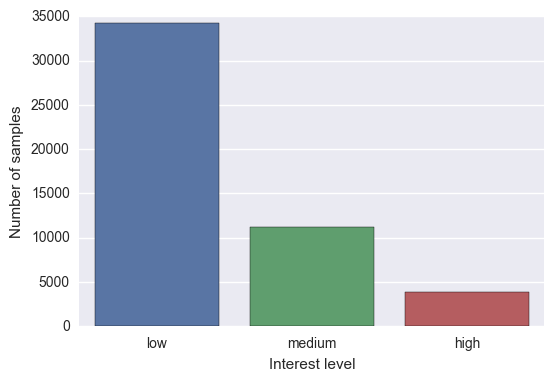

In [4]:
interest_level = train_df['interest_level'].value_counts()
sns.barplot(x=interest_level.index,y=interest_level.values)
print(train_df['interest_level'].value_counts(normalize=True))
plt.xlabel('Interest level')
plt.ylabel('Number of samples')

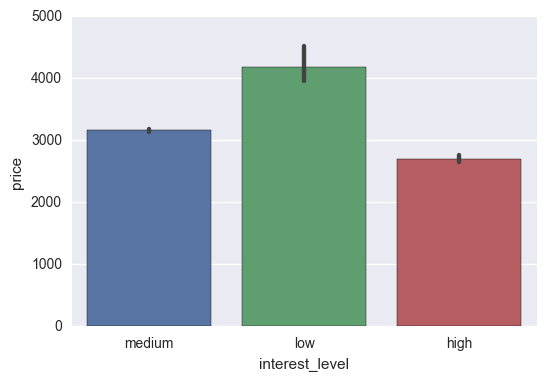

In [5]:
x_name = 'interest_level'
y_name = 'price'
sns.barplot(x=x_name,y=y_name,data=train_df)
# print(train_df['interest_level'].value_counts(normalize=True))
plt.xlabel(x_name)
plt.ylabel(y_name)

4490000


(array([   3.,   16.,  520., ...,    0.,    0.,    0.]),
 array([      0,     500,    1000, ..., 4488500, 4489000, 4489500]),
 <a list of 8979 Patch objects>)

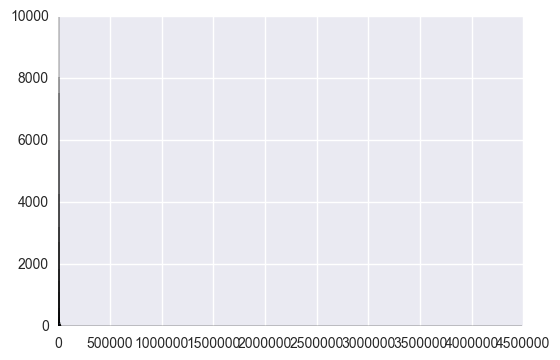

In [6]:
# there are some outliers
largest = max(train_df.price)
print(largest)
plt.hist(train_df.price,bins=range(0,largest,500))

C:\Users\twtpa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


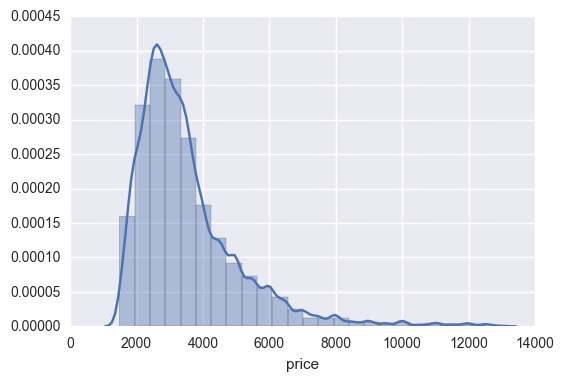

In [7]:
price_ulimit = np.percentile(train_df.price.values, 99)
price_dlimit = np.percentile(train_df.price.values, 1)

sns.distplot(train_df[(train_df.price>price_dlimit)&(train_df.price<price_ulimit)].price,bins=25)

In [8]:
train_df.bathrooms.ix[train_df['bathrooms']>3]=3
train_df.bathrooms.value_counts()

C:\Users\twtpa\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1.0    39422
2.0     7660
3.0     1035
1.5      645
0.0      313
2.5      277
Name: bathrooms, dtype: int64

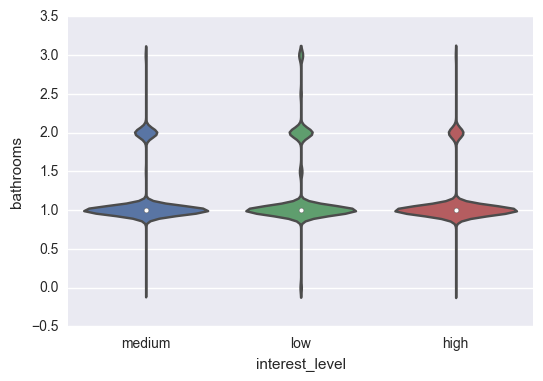

In [9]:
x_name = 'interest_level'
y_name = 'bathrooms'
sns.violinplot(x=x_name,y=y_name,data=train_df)
# print(train_df['interest_level'].value_counts(normalize=True))
plt.xlabel(x_name)
plt.ylabel(y_name)

C:\Users\twtpa\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


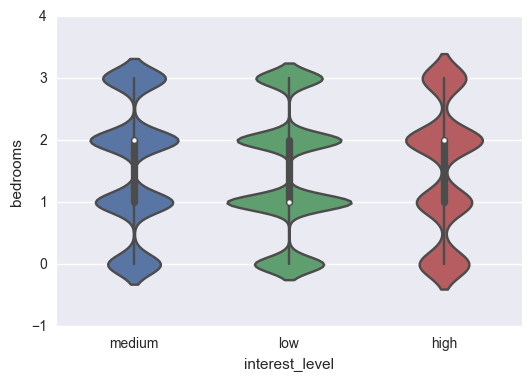

In [10]:
train_df.bedrooms.ix[train_df['bedrooms']>3]=3
train_df.bathrooms.value_counts()

x_name = 'interest_level'
y_name = 'bedrooms'
sns.violinplot(x=x_name,y=y_name,data=train_df)
# print(train_df['interest_level'].value_counts(normalize=True))
plt.xlabel(x_name)
plt.ylabel(y_name)

C:\Users\twtpa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


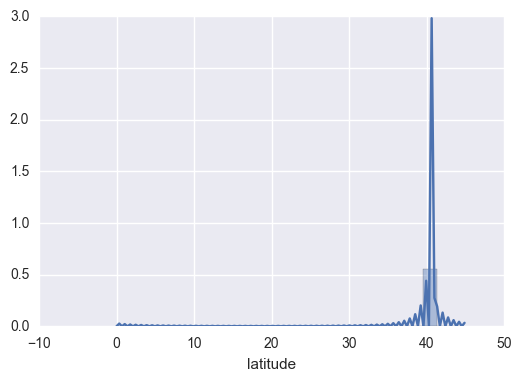

In [11]:
sns.distplot(train_df['latitude'],bins=25)

C:\Users\twtpa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


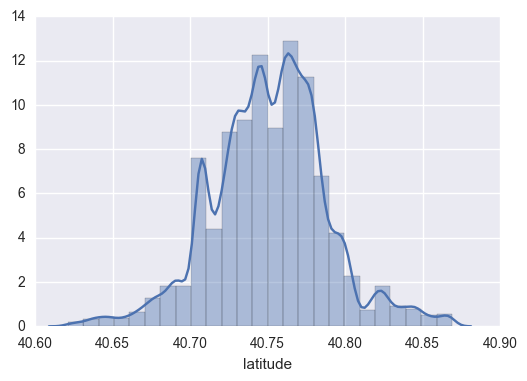

In [12]:
lat_ulimit = np.percentile(train_df.latitude.values, 99.5)
lat_dlimit = np.percentile(train_df.latitude.values, 0.5)

sns.distplot(train_df[(train_df.latitude>lat_dlimit)&(train_df.latitude<lat_ulimit)].latitude,bins=25)

C:\Users\twtpa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


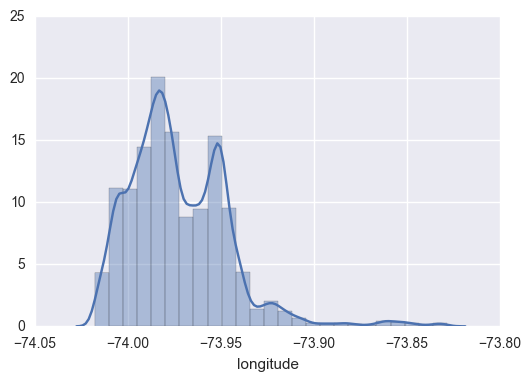

In [13]:
lon_ulimit = np.percentile(train_df.longitude.values, 99.5)
lon_dlimit = np.percentile(train_df.longitude.values, 0.5)

sns.distplot(train_df[(train_df.longitude>lon_dlimit)&(train_df.longitude<lon_ulimit)].longitude,bins=25)

In [15]:
# reference: https://www.kaggle.com/sudalairajkumar/two-sigma-connect-rental-listing-inquiries/simple-exploration-notebook-2-connect/notebook

from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west,east,north,south = lon_dlimit, lon_ulimit, lat_ulimit, lat_dlimit

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m.drawcoastlines()
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')

low_df = train_df[train_df['interest_level']=='low']
mid_df = train_df[train_df['interest_level']=='medium']
high_df = train_df[train_df['interest_level']=='high']

low_x, low_y = m(train_df['longitude'].values, train_df['latitude'].values)
mid_x, mid_y = m(train_df['longitude'].values, train_df['latitude'].values)
high_x, high_y = m(train_df['longitude'].values, train_df['latitude'].values)

m.plot(low_x, low_y, 'bo', markersize=1)#, gridsize=200,bins='log', cmap=cm.Reds);
m.plot(mid_x, mid_y, 'go', markersize=1)
m.plot(high_x,high_y, 'ro', markersize=1)
# m.hexbin(x, y, gridsize=200,bins='log', cmap=cm.YlOrRd_r);

ImportError: No module named 'mpl_toolkits.basemap'

https://www.trulia.com/home_prices/New_York/New_York-heat_map/